#### IMPORTING THE LIBRARIES

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline

#### LOADING THE DATASET

In [129]:
df = pd.read_csv('supermarket_sales.csv')

In [130]:
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [131]:
df.tail(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [132]:
df.shape

(1000, 17)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [134]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,26.494628,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,245.885335,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,234.176510,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,0.000000,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580,4.000000,5.500000,7.000000,8.500000,10.000000


In [135]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

### Data Cleaning

In [136]:
df.dropna(axis=0)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [137]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

### Data Visualization


##### 1.Exploratory data analysis (EDA) using Klib Library

In [139]:
import klib

In [140]:
 # klib.corr_mat(df) # returns a color-encoded correlation matrix
 # klib.corr_plot(df) # returns a color-encoded heatmap, ideal for correlations
 # klib.dist_plot(df) # returns a distribution plot for every numeric feature
 # klib.missingval_plot(df) # returns a figure containing information about missing values

###### HEATMAP 
###### A heatmap is a graphical representation of data that uses a system of color-coding to represent different values. Heatmaps are used in various forms of analytics but are most commonly used to show user behaviour on specific webpages or webpage templates.

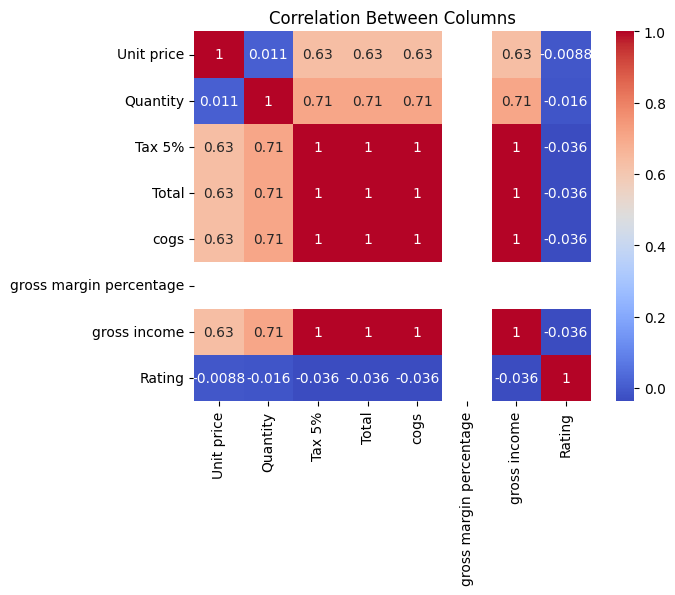

In [141]:
# Create a subset of the DataFrame with only the numerical columns
numerical_cols = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating']
df_numerical = df[numerical_cols]

# Calculate the correlation matrix
corr_matrix = df_numerical.corr()

# Create a heatmap to visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set the title of the heatmap
plt.title("Correlation Between Columns")

# Show the plot
plt.show()


In [142]:
klib.corr_mat(df) # returns a color-encoded correlation matrix

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.00,0.01,0.63,0.63,0.63,-,0.63,-0.01
Quantity,0.01,1.00,0.71,0.71,0.71,-,0.71,-0.02
Tax 5%,0.63,0.71,1.00,1.00,1.00,-,1.00,-0.04
Total,0.63,0.71,1.00,1.00,1.00,-,1.00,-0.04
cogs,0.63,0.71,1.00,1.00,1.00,-,1.00,-0.04
gross margin percentage,-,-,-,-,-,-,-,-
gross income,0.63,0.71,1.00,1.00,1.00,-,1.00,-0.04
Rating,-0.01,-0.02,-0.04,-0.04,-0.04,-,-0.04,1.00


###### JOINTPLOT
###### Seaborn's jointplot displays a relationship between 2 variables (bivariate) as well as 1D profiles (univariate) in the margins. This plot is a convenience class that wraps JointGrid.

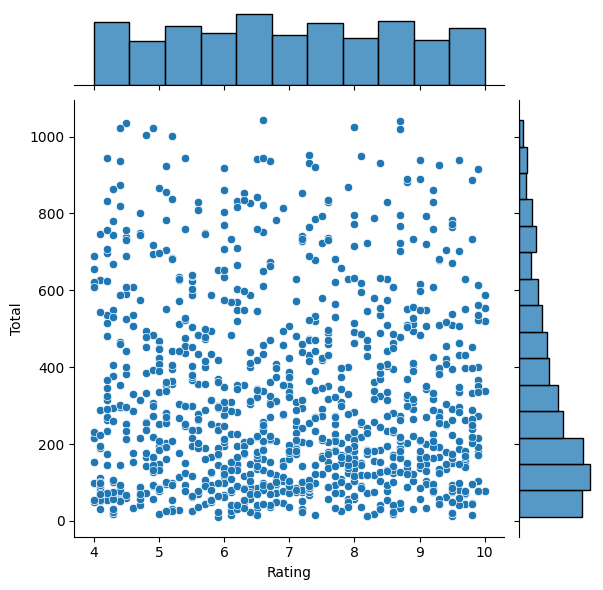

In [143]:
sns.jointplot(x='Rating', y= 'Total', data=df)

###### LINEPLOT
###### A Line plot can be defined as a graph that displays data as points or check marks above a number line, showing the frequency of each value.

<AxesSubplot: xlabel='Rating', ylabel='Unit price'>

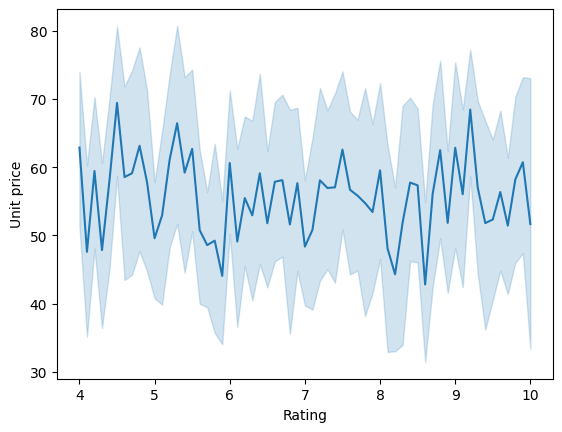

In [144]:
sns.lineplot(x='Rating', y= 'Unit price', data=df)

###### BARPLOT
###### A barplot (or barchart) is one of the most common types of graphic. It shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.

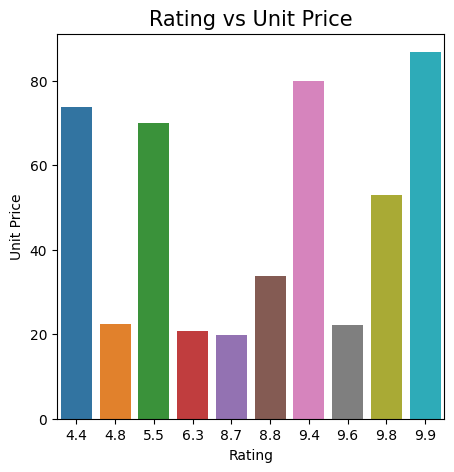

In [145]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Rating", y="Unit price", data=df[170:180])
plt.title("Rating vs Unit Price",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Unit Price")
plt.show()

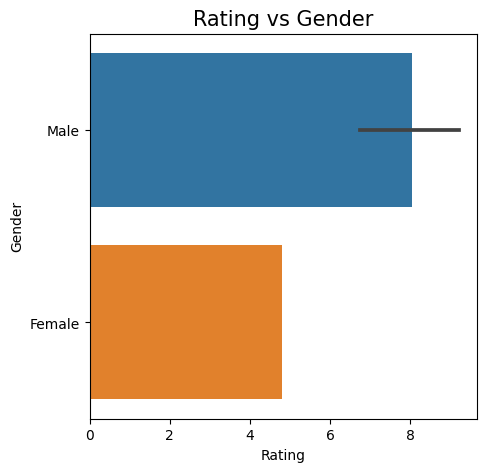

In [146]:
plt.style.use("default")  # Set the default plotting style for matplotlib
plt.figure(figsize=(5, 5))  # Create a figure with a size of 5x5 inches
sns.barplot(x="Rating", y="Gender", data=df[170:180])  # Create a bar plot with 'Rating' on the x-axis and 'Gender' on the y-axis using data from  selects a range of rows 170 to 179 of the DataFrame 'df'

plt.title("Rating vs Gender", fontsize=15)  # Set the title of the plot to 'Rating vs Gender' with a font size of 15
plt.xlabel("Rating")  # Set the label for the x-axis as 'Rating'
plt.ylabel("Gender")  # Set the label for the y-axis as 'Gender'

plt.show()  # Display the plot on the screen


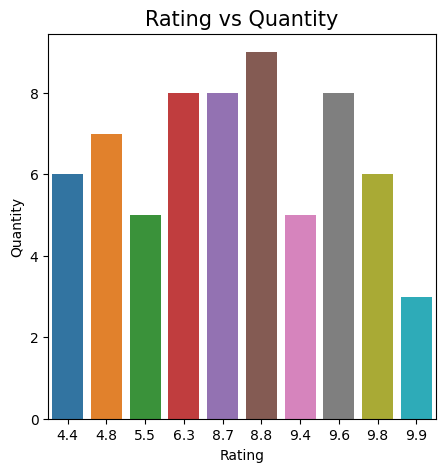

In [147]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Rating", y="Quantity", data=df[170:180])
plt.title("Rating vs Quantity",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Quantity")
plt.show()

<AxesSubplot: title={'center': 'Feature-correlation (pearson)'}>

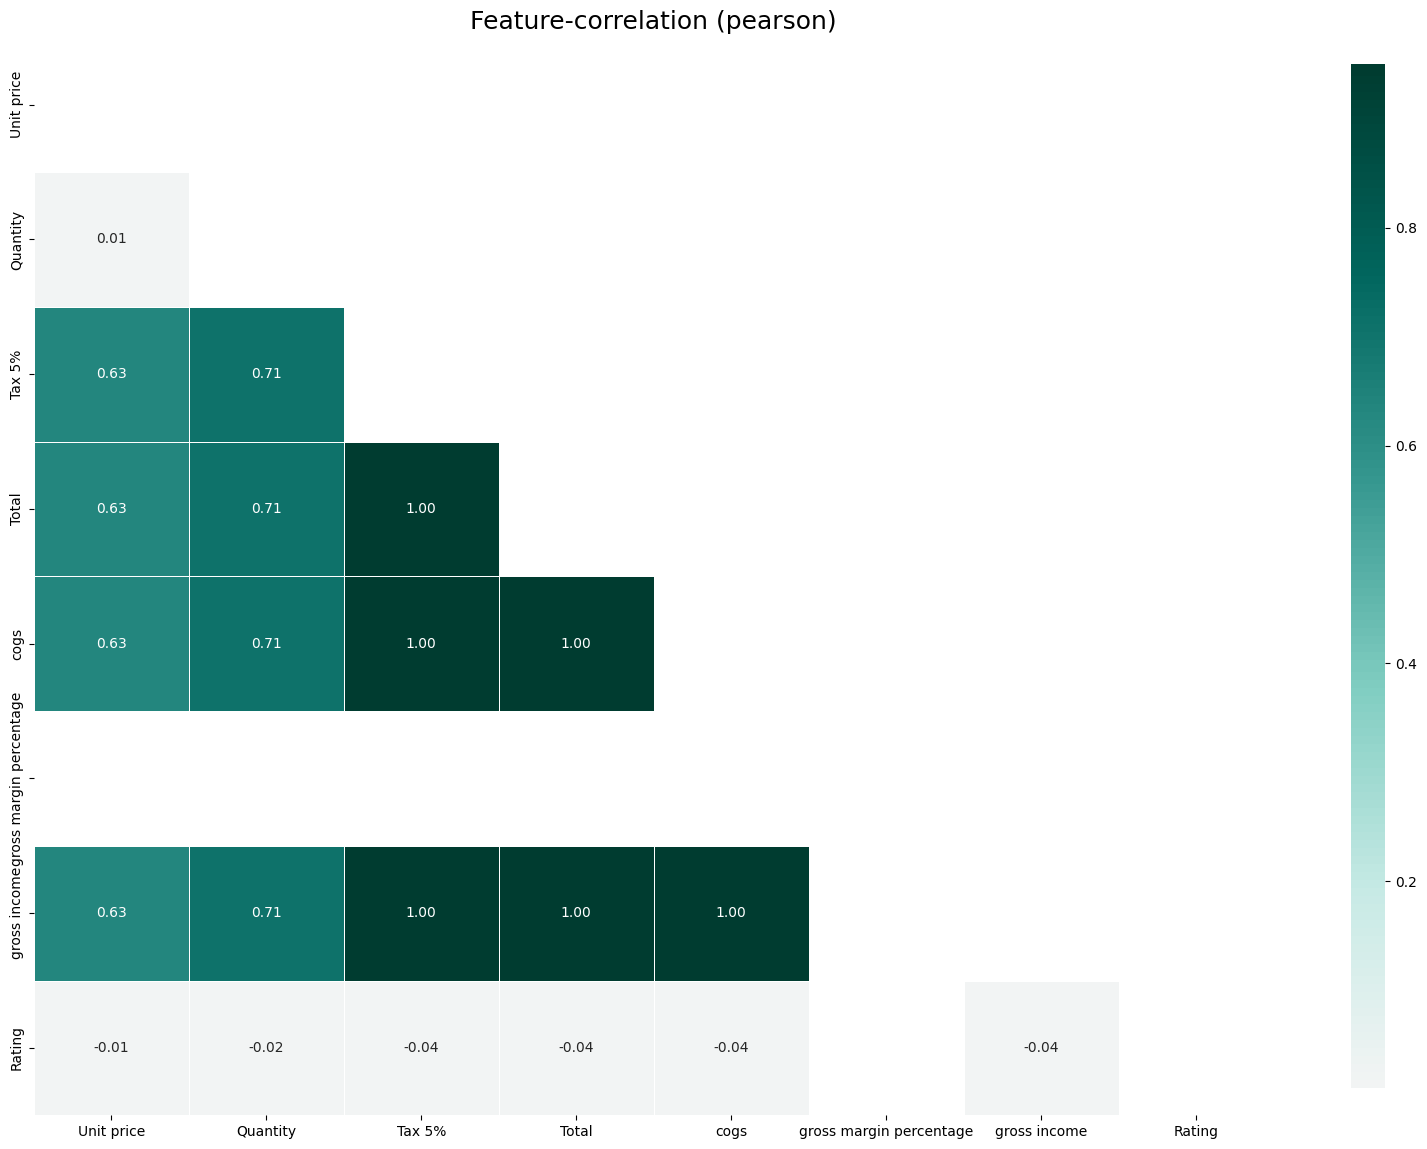

In [148]:
klib.corr_plot(df, figsize=(20,14))   # returns a color-encoded heatmap, ideal for correlations

<AxesSubplot: xlabel='Rating', ylabel='Density'>

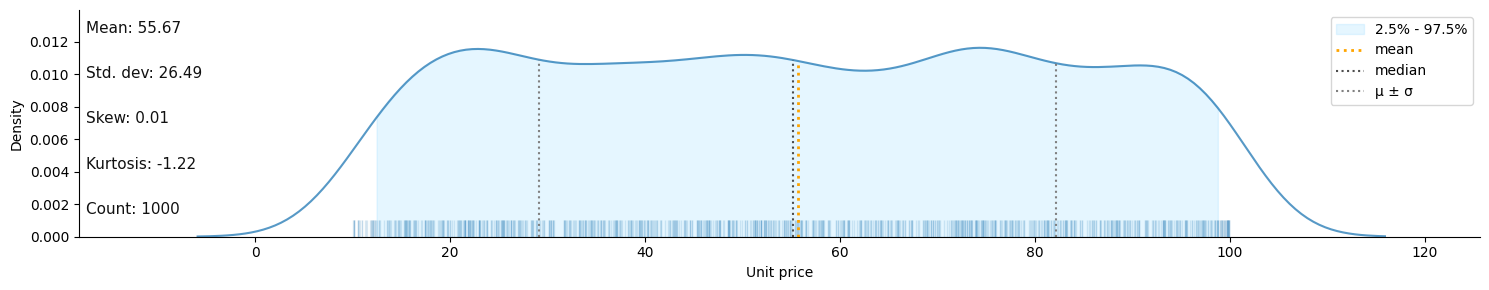

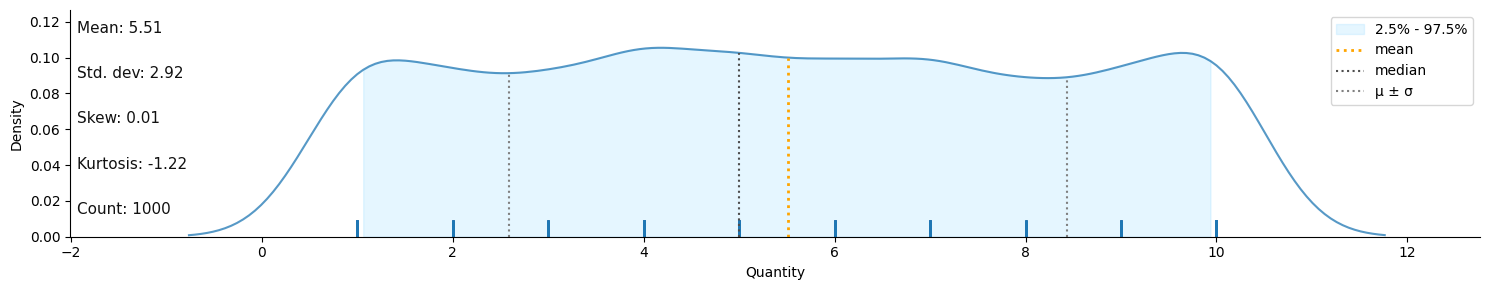

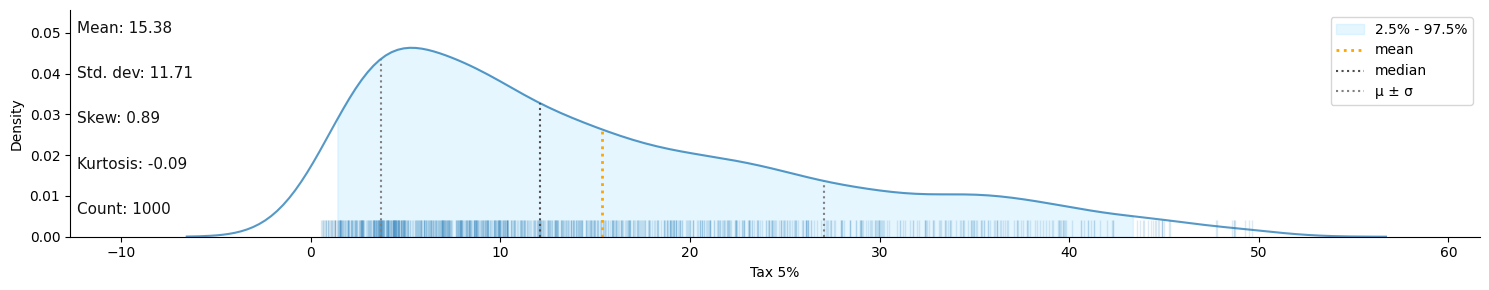

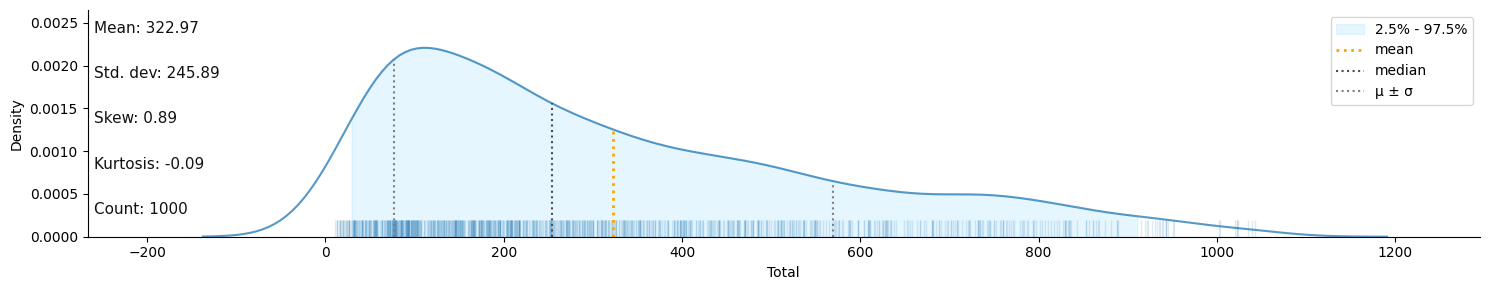

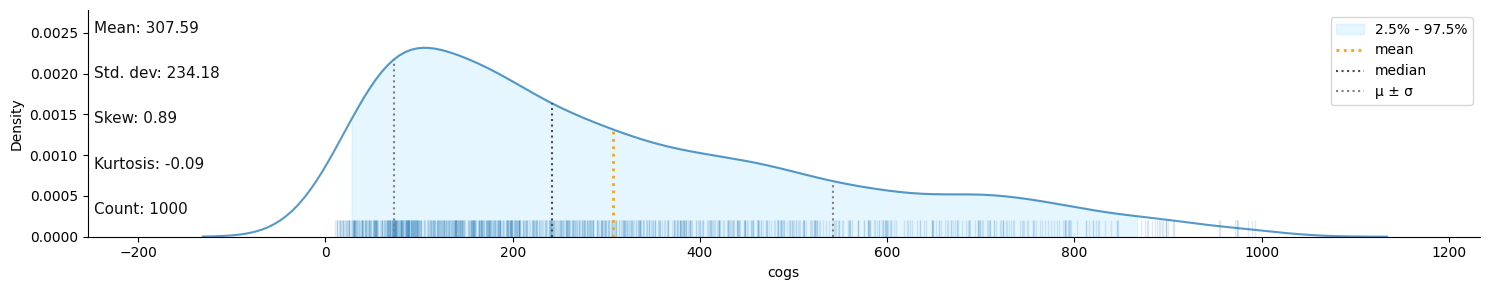

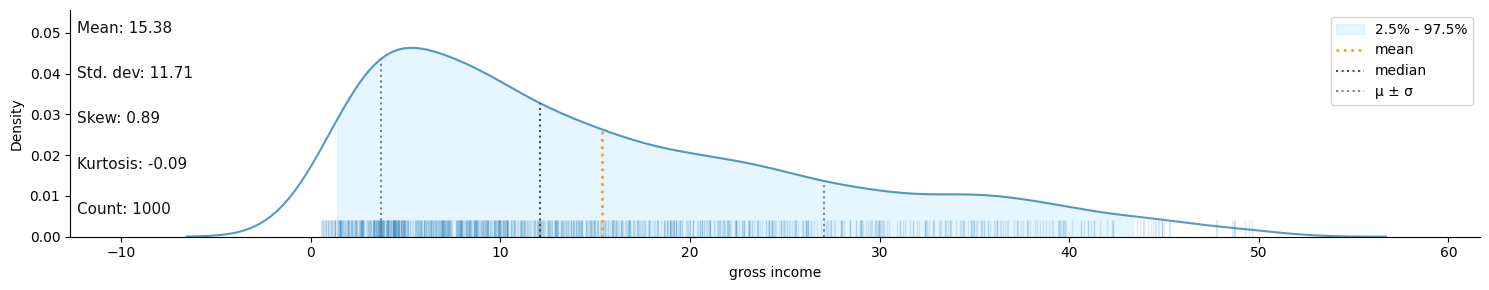

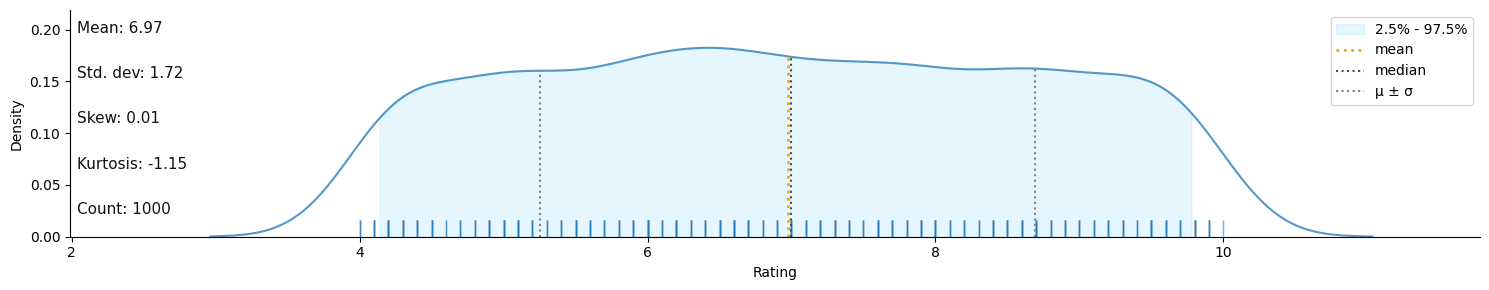

In [149]:
klib.dist_plot(df) # returns a distribution plot for every numeric feature

In [150]:
klib.missingval_plot(df) # returns a figure containing information about missing values

No missing values found in the dataset.


##### 2. Dtale
###### D-Tale is a powerful tool for data exploration and analysis, particularly when working with medium to large-sized datasets. It offers an intuitive and interactive interface that simplifies the process of understanding and gaining insights from your data.

In [151]:
import dtale

In [152]:
dtale.show(df)

In [153]:
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


##### Select features based on general requirements

In [154]:
df.drop(['Invoice ID','Payment'],axis=1,inplace=True)
df.head(5)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,604.17,4.761905,30.2085,5.3


### Preprocessing Task before Model Building

1. Label Encoding

In [155]:
df = pd.read_csv('supermarket_sales.csv')

In [156]:
df.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4


In [157]:
df.drop(['Invoice ID','Payment'],axis=1,inplace=True)

In [158]:
from sklearn.preprocessing import LabelEncoder
# Create an instance of LabelEncoder
le = LabelEncoder()

#lets find the categorialfeatures
list_1=list(df.columns)

list_cate=[]
for i in list_1:
    if df[i].dtype=='object':
        list_cate.append(i)

for i in list_cate:
    df[i]=le.fit_transform(df[i])

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   int32  
 1   City                     1000 non-null   int32  
 2   Customer type            1000 non-null   int32  
 3   Gender                   1000 non-null   int32  
 4   Product line             1000 non-null   int32  
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7   Tax 5%                   1000 non-null   float64
 8   Total                    1000 non-null   float64
 9   Date                     1000 non-null   int32  
 10  Time                     1000 non-null   int32  
 11  cogs                     1000 non-null   float64
 12  gross margin percentage  1000 non-null   float64
 13  gross income             1000 non-null   float64
 14  Rating                   

In [160]:
df.head(5)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,cogs,gross margin percentage,gross income,Rating
0,0,2,0,0,3,74.69,7,26.1415,548.9715,26,146,522.83,4.761905,26.1415,9.1
1,2,1,1,0,0,15.28,5,3.8200,80.2200,87,23,76.40,4.761905,3.8200,9.6
2,0,2,1,1,4,46.33,7,16.2155,340.5255,81,155,324.31,4.761905,16.2155,7.4
3,0,2,0,1,3,58.22,8,23.2880,489.0480,19,485,465.76,4.761905,23.2880,8.4
4,0,2,1,1,5,86.31,7,30.2085,634.3785,57,29,604.17,4.761905,30.2085,5.3


In [161]:
df.tail(5)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,cogs,gross margin percentage,gross income,Rating
995,2,1,1,1,3,40.35,1,2.0175,42.3675,21,174,40.35,4.761905,2.0175,6.2
996,1,0,1,0,4,97.38,10,48.6900,1022.4900,70,342,973.80,4.761905,48.6900,4.4
997,0,2,0,1,2,31.84,1,1.5920,33.4320,58,154,31.84,4.761905,1.5920,7.7
998,0,2,1,1,4,65.82,1,3.2910,69.1110,45,261,65.82,4.761905,3.2910,4.1
999,0,2,0,0,1,88.34,7,30.9190,649.2990,40,160,618.38,4.761905,30.9190,6.6


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   int32  
 1   City                     1000 non-null   int32  
 2   Customer type            1000 non-null   int32  
 3   Gender                   1000 non-null   int32  
 4   Product line             1000 non-null   int32  
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7   Tax 5%                   1000 non-null   float64
 8   Total                    1000 non-null   float64
 9   Date                     1000 non-null   int32  
 10  Time                     1000 non-null   int32  
 11  cogs                     1000 non-null   float64
 12  gross margin percentage  1000 non-null   float64
 13  gross income             1000 non-null   float64
 14  Rating                   

#### Training and Testing Data

In [163]:
y=df['Gender']
x=df.drop('Gender',axis=1)

In [164]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [165]:
print('shape of x_train = ', x_train.shape)
print('shape of y_train = ', y_train.shape)
print('shape of x_test = ', x_test.shape)
print('shape of y_test = ', y_test.shape)

shape of x_train =  (800, 14)
shape of y_train =  (800,)
shape of x_test =  (200, 14)
shape of y_test =  (200,)


##### MODELS

1. KNeighborsClassifier(KNN)
###### By default, the KNeighborsClassifier looks for the 5 nearest neighbors. We must explicitly tell the classifier to use Euclidean distance for determining the proximity between neighboring points.



In [166]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

# Create an instance of the KNeighborsClassifier with 7 neighbors
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(x_train, y_train)

# Calculate the accuracy score on the test data
accuracy = knn.score(x_test, y_test)
# Print the accuracy score
print('Accuracy:', accuracy)


Accuracy: 0.48


In [167]:
y_pred = knn.predict(x_test)


In [168]:
# Define the patient data as a dictionary with column names
Market_Data = {
    'Branch': [2.00],
    'City': [1.00],
    'Customer type': [1.00],
    'Product line': [0.00],
    'Unit price': [15.28],
    'Quantity': [5.00],
    'Tax 5%': [3.82],
    'Total': [80.22],
    'Date': [87.00],
    'Time': [23.00],
    'cogs': [76.40],
    'gross margin percentage': [4.76],
    'gross income': [16.21],
    'Rating': [ 9.60]
}

# Create a DataFrame from the patient data
df = pd.DataFrame(Market_Data)

# Create an instance of the KNeighborsClassifier with 7 neighbors
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(x_train, y_train)

# Make predictions
prediction = knn.predict(df)

# Map the prediction to a diagnosis label
gender = 'Female' if prediction[0] == 0 else 'Male'

print(f"Predicted gender: {gender}")

Predicted gender: Female


In [172]:
# Define the column names
columns = ['Branch', 'City', 'Customer type', 'Product line', 'Unit price', 'Quantity',
           'Tax 5%', 'Total', 'Date', 'Time', 'cogs', 'gross margin percentage',
           'gross income', 'Rating']

# Define the corresponding values
values = [12.5, 9.75, 7.82, 58.4, 785.0, 0.0923, 0.2156, 0.1862, 0.0974, 0.1725,
          0.05731, 0.782, 0.6354, 6.784]

# Create a dictionary from the column names and values
patient_Data = dict(zip(columns, values))

# Create a DataFrame from the patient data
Market_Data = pd.DataFrame(patient_Data, index=[0])
print(f"Predicted gender: {gender}")


Predicted gender: Female


In [173]:
y_pred=knn.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",knn.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.48      0.53      0.50       100
           1       0.48      0.43      0.45       100

    accuracy                           0.48       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.48      0.48      0.48       200

Confusion Matrix:
 [[53 47]
 [57 43]]
Training Score:
 65.375


## Performance

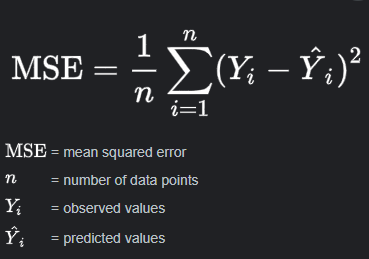

In [ ]:
from sklearn.metrics import mean_squared_error

# Make predictions on the test set
y_pred = knn.predict(x_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

##### 2. DECISION TREE CLASSIFIER

###### Decision trees use multiple algorithms to decide to split a node into two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. ... The decision tree splits the nodes on all available variables and then selects the split which results in most homogeneous sub-nodes.

In [174]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')

dtree.fit(x_train,y_train)

# Fit the classifier to the training data
dtree.fit(x_train, y_train)

# Calculate the accuracy score on the test data
accuracy = dtree.score(x_test, y_test)

# Print the accuracy score
print('Accuracy:', accuracy)


Accuracy: 0.54


In [175]:
y_pred=dtree.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",dtree.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.53      0.79      0.63       100
           1       0.58      0.29      0.39       100

    accuracy                           0.54       200
   macro avg       0.55      0.54      0.51       200
weighted avg       0.55      0.54      0.51       200

Confusion Matrix:
 [[79 21]
 [71 29]]
Training Score:
 63.5


In [182]:
from sklearn.metrics import mean_squared_error

# Make predictions on the test set
y_pred = dtree.predict(x_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 0.46


##### 3. Random Forest Classifier

###### A random forest classifier. A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [177]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

# Calculate the accuracy score on the test data
accuracy = dtree.score(x_test, y_test)

# Print the accuracy score
print('Accuracy:', accuracy)

Accuracy: 0.54


In [178]:
y_pred=rfc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",rfc.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.51      0.48      0.49       100
           1       0.50      0.53      0.52       100

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.51      0.51      0.50       200

Confusion Matrix:
 [[48 52]
 [47 53]]
Training Score:
 100.0


In [183]:
from sklearn.metrics import mean_squared_error

# Make predictions on the test set
y_pred = rfc.predict(x_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 0.495


##### 4. XGBClassifier

###### XGBoost is a popular and efficient open-source implementation of the gradient boosted trees algorithm. Gradient boosting is a supervised learning algorithm, which attempts to accurately predict a target variable by combining the estimates of a set of simpler, weaker models.

In [180]:
from xgboost import XGBClassifier

xgb =XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xgb.fit(x_train, y_train)

[12:12:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, num_parallel_tree=None,
              objective='reg:linear', ...)

In [181]:
y_pred=xgb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",xgb.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.51      0.50      0.50       100
           1       0.50      0.51      0.51       100

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.51      0.51      0.50       200

Confusion Matrix:
 [[50 50]
 [49 51]]
Training Score:
 62.125


In [184]:
from sklearn.metrics import mean_squared_error

# Make predictions on the test set
y_pred = xgb.predict(x_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 0.495
